![separator2](https://i.imgur.com/4gX5WFr.png)

<img src="https://www.crikey.com.au/wp-content/uploads/2019/09/GettyImages-916333660.jpg?w=740"
    style="width:800px; float: middle; margin: 0 40px 40px 40px;"></img>
# Bicycle Share Scheme
## Datathon Individual de Henry
### Autora: Cristina del Valle Zamorano 
#### https://www.linkedin.com/in/cristina-zamorano-36623a86

![separator2](https://i.imgur.com/4gX5WFr.png)

### Se importan e instalan las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import sklearn as sk
%matplotlib inline

![separator2](https://i.imgur.com/4gX5WFr.png)

### Preparación y limpieza de datos:
Se cargará el conjunto de datos los dataframe, se veran las columnas y filas de los datos, se realizará estadísticas descriptivas para conocer mejor las características dentro del conjunto de datos, se escribirá las observaciones, se encontrará (en caso de ser necesario) los valores faltantes.

### Se crean los Dataframe utilizando Pandas

* bike_train
* bike_test

In [3]:
#se importan los datos bike_train.xlsx
bike_train = pd.read_excel('bike_train.xlsx')
bike_train.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#se importan los datos bike_test.xlsx
bike_test = pd.read_excel('bike_test.xlsx')
bike_test.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,2012-05-20,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,2012-05-20,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,2012-05-20,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642


##### Tamaño del Data Frame (numero de filas y columnas) y Nombre de las columnas

In [5]:
print('Cantidad de Filas y columnas:',bike_train.shape)
print('Nombre columnas:',bike_train.columns)

Cantidad de Filas y columnas: (11999, 17)
Nombre columnas: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [6]:
print('Cantidad de Filas y columnas:',bike_test.shape)
print('Nombre columnas:',bike_test.columns)

Cantidad de Filas y columnas: (5380, 14)
Nombre columnas: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')


##### Columnas, nulos y tipo de datos

In [7]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [8]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


### bike_train 
* Cantidad de Filas: 11999- Cada registro muestra la **cantidad de bicicletas alquiladas.** La suma total de alquileres es **1.902.981** y la cantidad máxima por registro es de **957** alquileres.
* Cantidad de Columnas: 17
* Sin datos nulos

### bike_test
* Cantidad de Filas: 5380 - Cada registro muestra un **alquiler individual.** La suma total de alquileres es de **5380**
* Cantidad de Columnas: 14
* Sin datos nulos

In [9]:
#Numero total de cnt
bike_train['cnt'].sum()

1902981

In [10]:
# valor máximo de cnt 
bike_train['cnt'].max()

957

#### Se van a eliminar las columnas del Data Frame **bike_train** que no se encuentren en **bike_test**, excepto **cnt**.

In [11]:
# Se van a eliminar las columnas del Data Frame **bike_train** que no se encuentren en **bike_test**, excepto cnt
bike_train = bike_train.drop(['instant','casual','registered'], axis=1)
bike_train.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [12]:
#borrar la columna instant de la base de datos bike_test
bike_test = bike_test.drop(['instant'], axis=1)
bike_test.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,2012-05-20,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,2012-05-20,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,2012-05-20,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642


In [13]:
bike_test.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
5375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
5376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
5377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
5378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343
5379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343


#### * Los datos de bike_train abarca desde el 01/01/2011 al 20/05/2012 

#### * Los datos de bike_test abarca desde el 20/05/2012 al 31/12/12

#### Estadisticas descriptivas: 

In [14]:
bike_train.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,158.594966
std,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,151.392952
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,34.000000
50%,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,118.000000
75%,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,232.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,957.000000


In [15]:
bike_test.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700


### Correlación de los datos

In [16]:
#calcular la correlacion entre las variables de bike_train
bike_train.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.111369
yr,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.156960
mnth,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.073431
hr,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.396698
holiday,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,-0.030304
weekday,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.022618
workingday,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,0.025132
weathersit,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.149848
temp,0.410790,-0.198929,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.395743
atemp,0.413196,-0.190360,0.358541,0.134633,-0.038005,-0.009841,0.066305,-0.081386,0.991785,1.000000,-0.003669,-0.057619,0.395234


In [17]:
#ordenar de mayor a menor correlacion
bike_train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

season      season       1.000000
temp        atemp        0.991785
mnth        season       0.865268
yr          mnth         0.488103
            season       0.446665
                           ...   
            weekday      0.002714
workingday  windspeed    0.002493
            yr           0.001068
holiday     yr           0.001039
hr          holiday      0.000414
Length: 79, dtype: float64

In [18]:
#ordenar las correlaciones de cn de mayor a menor
bike_train.corr().abs()['cnt'].sort_values(ascending=False)

cnt           1.000000
hr            0.396698
temp          0.395743
atemp         0.395234
hum           0.303672
yr            0.156960
weathersit    0.149848
season        0.111369
windspeed     0.094791
mnth          0.073431
holiday       0.030304
workingday    0.025132
weekday       0.022618
Name: cnt, dtype: float64

In [19]:
#calcular la correlacion entre las variables de bike_test
bike_test.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
season,1.000000,NaN,0.491815,-0.000481,-0.029560,0.007752,0.029156,0.002945,-0.253303,-0.223972,0.026825,-0.091152
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.491815,NaN,1.000000,0.000133,0.040445,0.011644,-0.031176,0.129539,-0.779969,-0.761877,0.085406,0.012960
hr,-0.000481,NaN,0.000133,1.000000,0.000677,-0.002326,-0.000340,-0.011413,0.149610,0.146253,-0.327878,0.155250
holiday,-0.029560,NaN,0.040445,0.000677,1.000000,-0.101208,-0.260756,-0.021687,-0.034763,-0.025364,0.052270,-0.037032
weekday,0.007752,NaN,0.011644,-0.002326,-0.101208,1.000000,0.046774,-0.030047,0.020362,-0.003897,-0.066030,0.018021
workingday,0.029156,NaN,-0.031176,-0.000340,-0.260756,0.046774,1.000000,0.050285,0.048787,0.036161,-0.002209,-0.035967
weathersit,0.002945,NaN,0.129539,-0.011413,-0.021687,-0.030047,0.050285,1.000000,-0.149031,-0.157319,0.387148,0.064587
temp,-0.253303,NaN,-0.779969,0.149610,-0.034763,0.020362,0.048787,-0.149031,1.000000,0.975469,-0.222222,0.019468
atemp,-0.223972,NaN,-0.761877,0.146253,-0.025364,-0.003897,0.036161,-0.157319,0.975469,1.000000,-0.197731,-0.014842


In [20]:
#ordenar de mayor a menor correlacion en la tabla bike_test
bike_test.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

season      season        1.000000
temp        atemp         0.975469
mnth        temp          0.779969
atemp       mnth          0.761877
mnth        season        0.491815
hum         weathersit    0.387148
hr          hum           0.327878
hum         windspeed     0.274399
holiday     workingday    0.260756
season      temp          0.253303
atemp       season        0.223972
hum         temp          0.222222
            atemp         0.197731
atemp       weathersit    0.157319
hr          windspeed     0.155250
            temp          0.149610
weathersit  temp          0.149031
hr          atemp         0.146253
weathersit  mnth          0.129539
holiday     weekday       0.101208
windspeed   season        0.091152
hum         mnth          0.085406
            weekday       0.066030
windspeed   weathersit    0.064587
holiday     hum           0.052270
workingday  weathersit    0.050285
            temp          0.048787
weekday     workingday    0.046774
mnth        holiday 

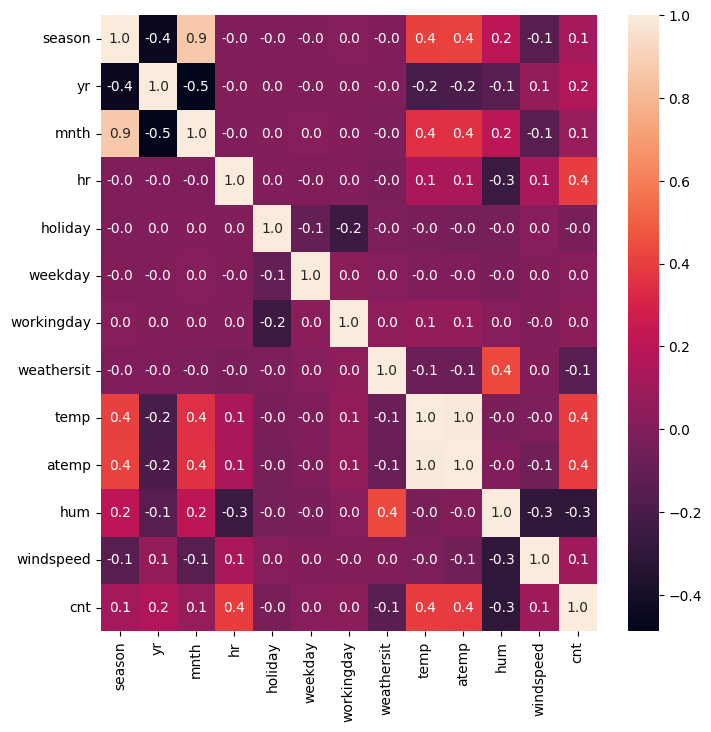

In [21]:
#mapa de calor
plt.figure(figsize=(8,8))
sns.heatmap(bike_train.corr(),annot=True,fmt='.1f')
plt.show()

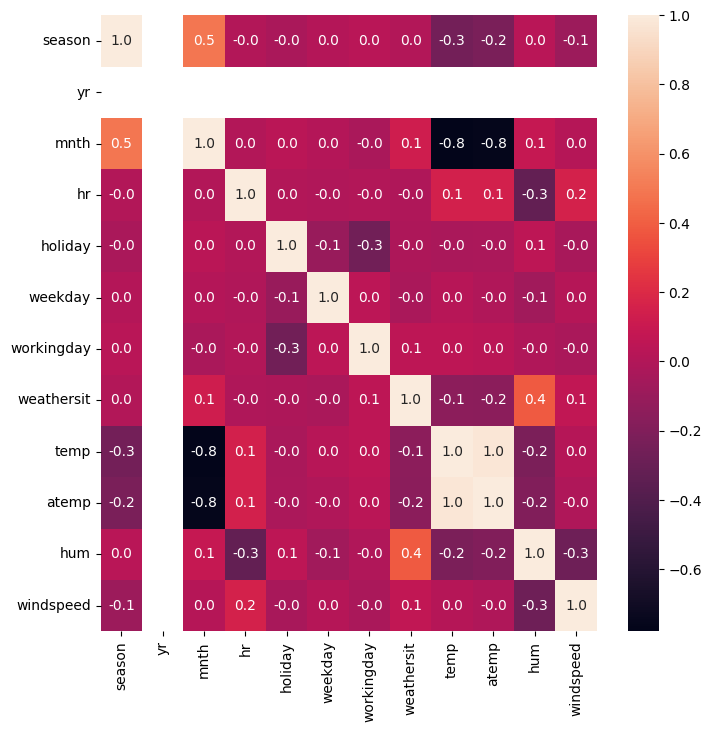

In [22]:
#mapa de calor de bike_test
plt.figure(figsize=(8,8))
sns.heatmap(bike_test.corr(),annot=True,fmt='.1f')
plt.show()

### Graficas de cnt por las features que mas se correlacionan.

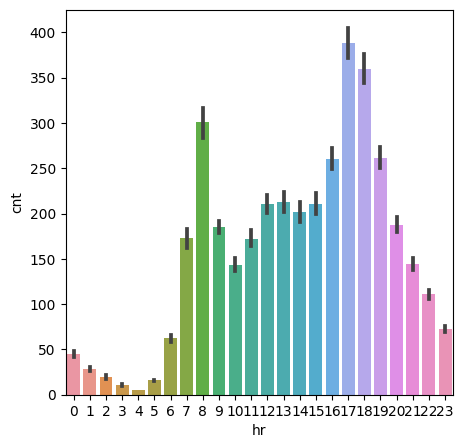

In [23]:
#graficar cnt por hr
plt.figure(figsize=(5,5))
sns.barplot(x='hr',y='cnt',data=bike_train)
plt.show()

#### Observaciones:
* Durante la noche entre las 23 y 6 de la mañana hay muy pocos alquileres.
* Los mayores picos se encuentran a la mañana, 8 hs. (ingreso laboral) y por la tarde: 17/18 hs. (fin del horario laboral)

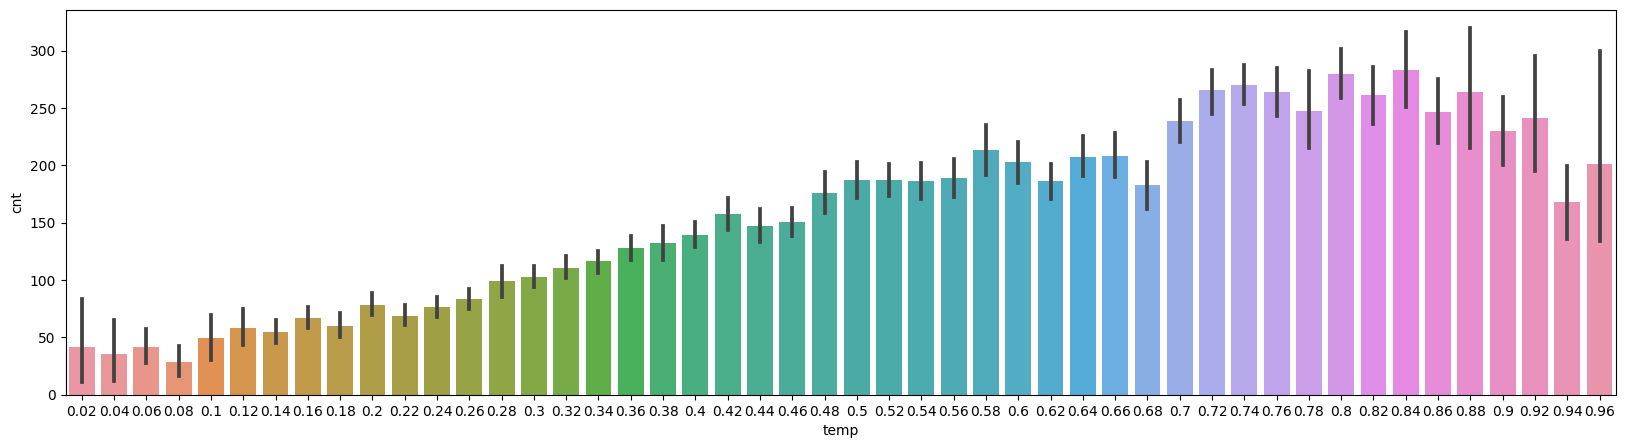

In [24]:
#graficar cnt por temp 
plt.figure(figsize=(20,5))
sns.barplot(x='temp',y='cnt',data=bike_train)
plt.show()


### Observaciones:
* a medida que aumenta la temperatura, aumenta el alquiler de bicicletas.
* con bajas temperaturas hay menor alquiler, al igual que cuando la temperatura es muy alta, empieza a descender los alquileres.
* el máximo contemplado en los datos son 40 grados = 1.

In [25]:
# se va a redondear la columna atemp a 2 decimales para poder graficar con mas claridad
bike_train['atemp'] = bike_train['atemp'].round(2)
bike_test['atemp'] = bike_test['atemp'].round(2)

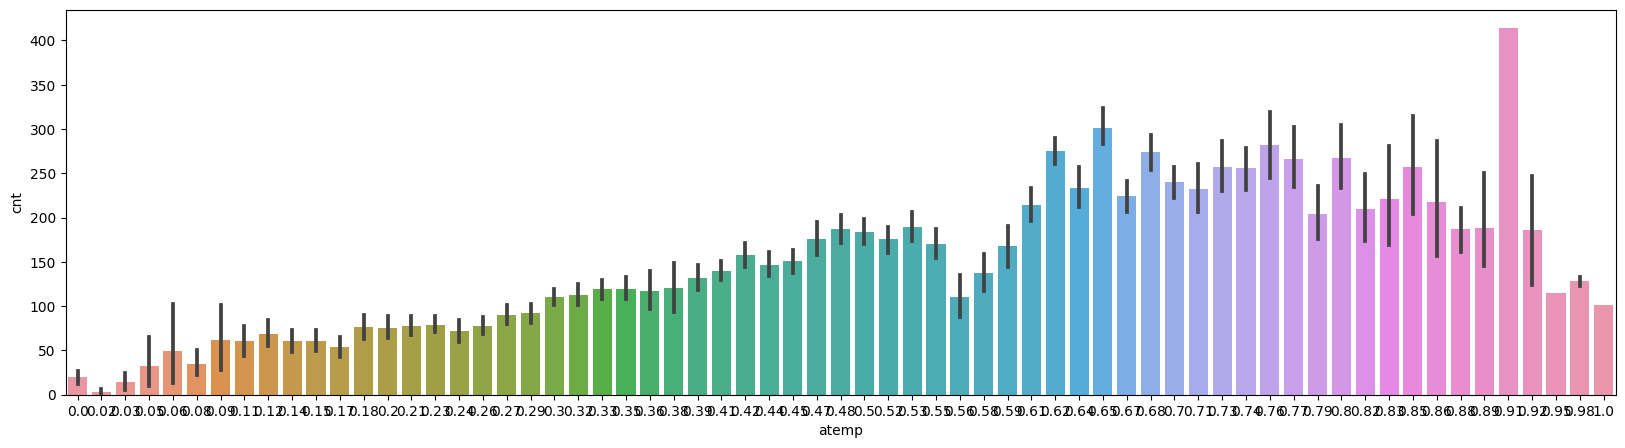

In [26]:
#graficar cnt por atemp
plt.figure(figsize=(20,5))
sns.barplot(x='atemp',y='cnt',data=bike_train)
plt.show()

#### Observaciones: 
* La sensación térmica, es la percepción subjetiva de cada persona tiene de la temperatura. Este índice varía según una serie de factores que involucran a la humedad y el viento, entre otras. 
* En los datos la sensación térmica se encuentra normalizada, y la temperatura máxima considerada en 50°C = 1
* En lineas generales sigue el mismo patrón que el gráfico de temperatura.

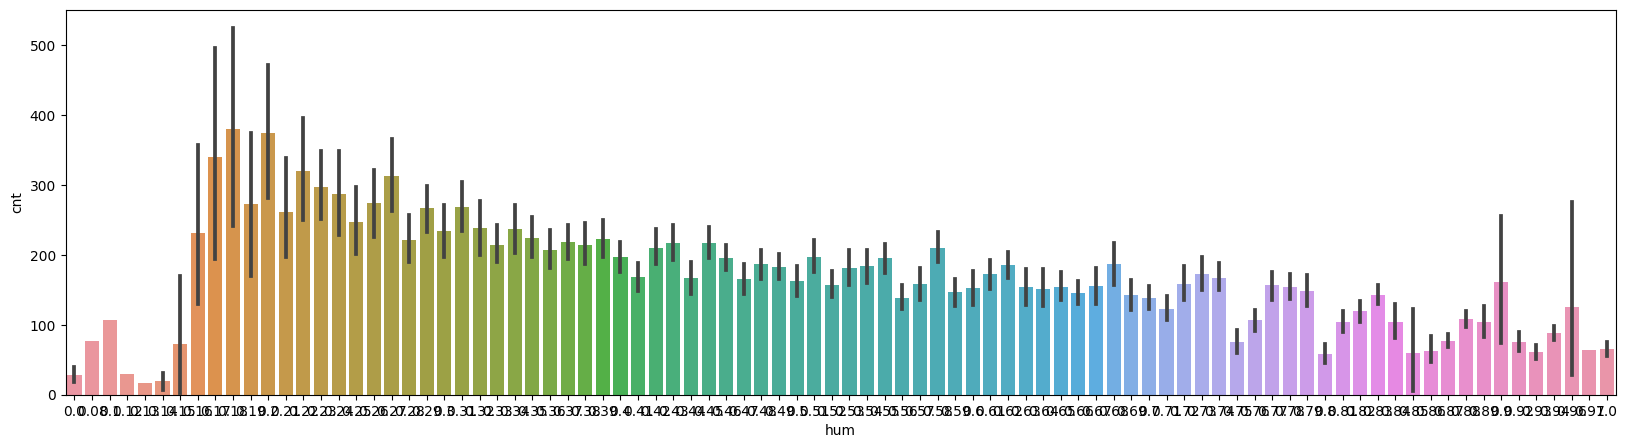

In [27]:
# graficar cnt por hum
plt.figure(figsize=(20,5))
sns.barplot(x='hum',y='cnt',data=bike_train)
plt.show()

##### Observaciones: 

* El nivel de humedad se encuentra normalizada, un 100% de humedad (dia de lluvia) = 1
* Se alquila mas bicicletas en los días de baja humedad.
* A medida que aumenta la humedad desciende el número de alquileres.

In [28]:
# redondear la columna wihdspeed a 2 decimales para poder graficar con mas claridad
bike_train['windspeed'] = bike_train['windspeed'].round(2)

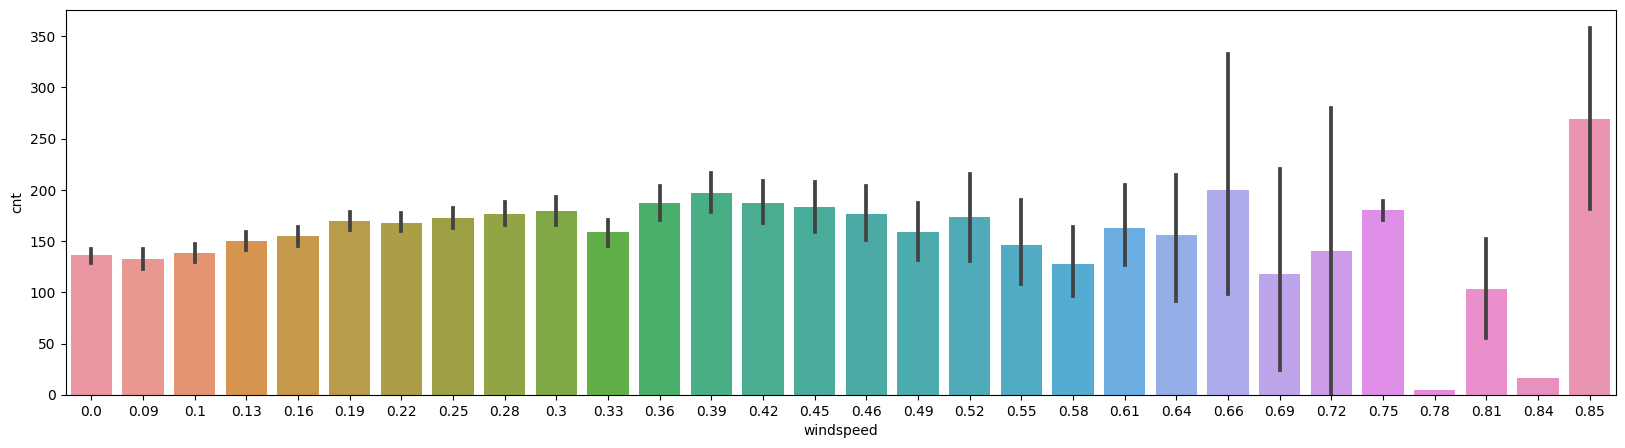

In [29]:
#graficar cnt por windspeed
plt.figure(figsize=(20,5))
sns.barplot(x='windspeed',y='cnt',data=bike_train)
plt.show()

#### Observaciones:
* La velocidad del viento se encuentra normalizada, 1 corresponde a 67 km/h
* hay un pico en 0.85, lo que corresponde a 57 km/h aproximadamente, si los vientos muy fuertes oscilan entre 50 y 61 km/h con dificultad en la marcha personal contra el viento, resulta dificil que en esas condicones climáticas haya habido tanto alquiler de rodados.

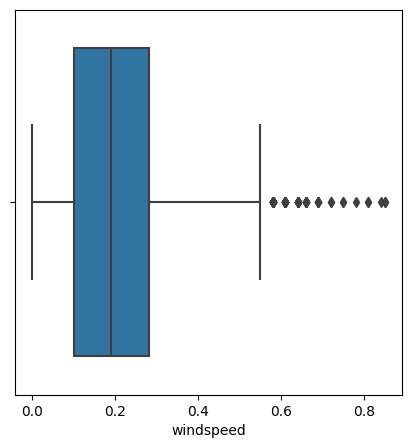

In [30]:
#detecccion de outliers de windspeed
plt.figure(figsize=(5,5))
sns.boxplot(x='windspeed',data=bike_train)
plt.show()

In [31]:
#cantidad de registros con un windspeed mayor a 0.6
bike_train[bike_train['windspeed']>0.6].shape

(53, 14)

In [32]:
#porcentaje de registros con un windspeed mayor a 0.6
#percent
bike_train[bike_train['windspeed']>0.6].shape[0]/bike_train.shape[0]

0.004417034752896075

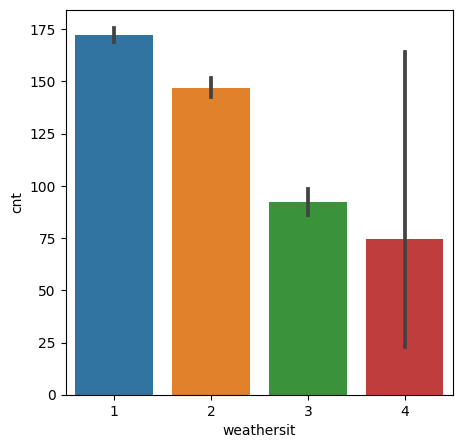

In [33]:
# graficar cnt por weathersit
plt.figure(figsize=(5,5))
sns.barplot(x='weathersit',y='cnt',data=bike_train)
plt.show()

#### Observaciones:
 * en buenas condiciones meteorologicas: despejado con algunas nubes o parcialmente nublado, se da el mayor número de alquileres.
 * Con neblina el número desciende.
 * En malas condiciones climáticas ( 3 y 4) los alquileres bajan aún mas.

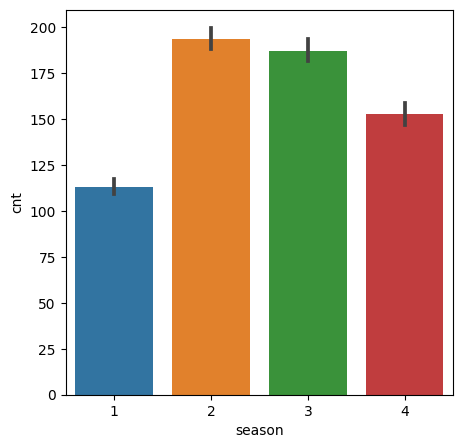

In [34]:
#cnt con season
plt.figure(figsize=(5,5))
sns.barplot(x='season',y='cnt',data=bike_train)
plt.show()

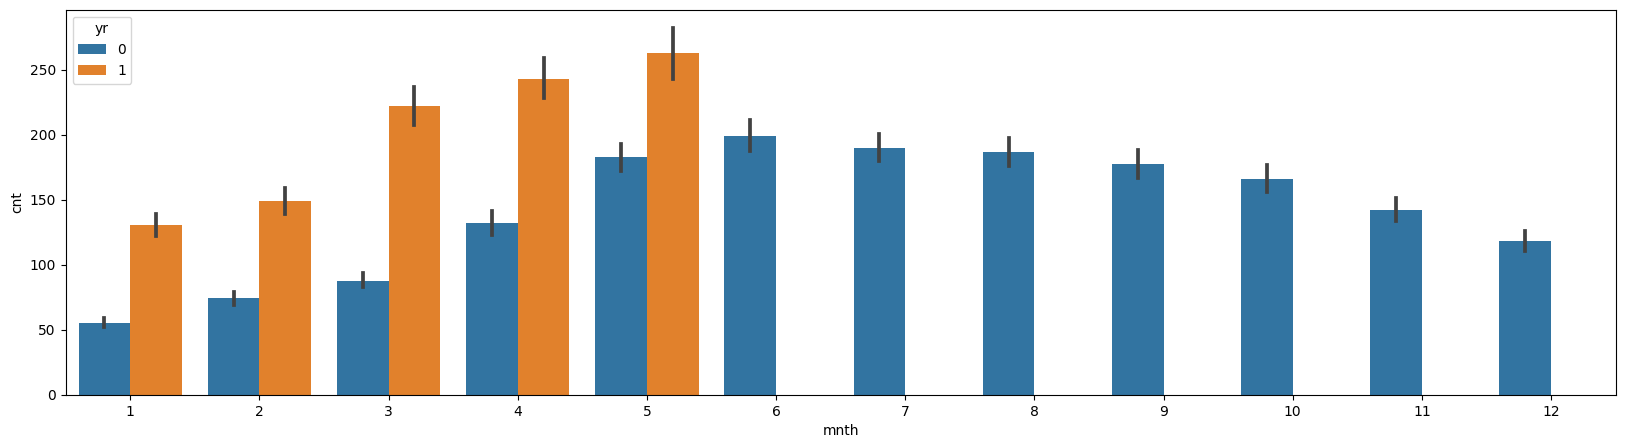

In [35]:
#cnt por mnth y yr
plt.figure(figsize=(20,5))
sns.barplot(x='mnth',y='cnt',hue='yr',data=bike_train)
plt.show()

#### Observaciones:
* A partir de marzo (inicio de la primaver en el hemisferio norte), empiezan a subir los alquileres de bicicleta.
* Desde Septiembre (inicio del otoño, inician a descender), los valores mas baos están en enero/febrero (plena temporada invernal).

<AxesSubplot:xlabel='season', ylabel='count'>

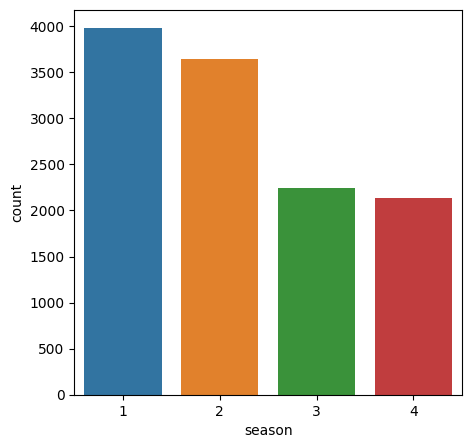

In [36]:
# season bike_train
plt.figure(figsize=(5,5))
sns.countplot(x='season',data=bike_train)

#### Observaciones:
* En **bike_test** se observa un patrón estacional similar, con subas en los meses cálidos (sobre todo primavera) y descenso en los meses fríos.

In [37]:
# bike_train agrupar por season
bike_train.groupby('season').size()

season
1    3980
2    3645
3    2240
4    2134
dtype: int64

In [38]:
bike_test.groupby('season').size()

season
1     262
2     764
3    2256
4    2098
dtype: int64

![separator2](https://i.imgur.com/4gX5WFr.png)

## Modelo de Machine Learning


#### Pasar fechas a números

En lugar de trabajar con fechas, se va a pasar a un número representativo, mediante la funcion **tordinal**.

In [39]:
import datetime as dt
bike_train['dteday']=bike_train['dteday'].map(dt.datetime.toordinal)
bike_train.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,734138,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.0,16
1,734138,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.0,40
2,734138,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.0,32
3,734138,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.0,13
4,734138,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.0,1


In [40]:
#cambiar tambien de dteday a ordinal en bike_test
bike_test['dteday']=bike_test['dteday'].map(dt.datetime.toordinal)
bike_test.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,734643,2,1,5,4,0,0,0,1,0.52,0.50,0.68,0.0896
1,734643,2,1,5,5,0,0,0,1,0.50,0.48,0.72,0.1045
2,734643,2,1,5,6,0,0,0,1,0.50,0.48,0.63,0.1343
3,734643,2,1,5,7,0,0,0,1,0.52,0.50,0.68,0.1940
4,734643,2,1,5,8,0,0,0,1,0.56,0.53,0.56,0.1642


![separator2](https://i.imgur.com/4gX5WFr.png)
### Modelo Random Forest Classifier

Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping). Esto implica que cada árbol se entrena con unos datos ligeramente distintos.

In [41]:
# se importan los modelos a utilizar de la libreria sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

#### Se crea el Data Frame con las características que se van a usar y el del target

In [42]:
bike_features = bike_train[['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

bike_target = bike_train['cnt']

#### Se crea el dataframe de features que se va a utilizar y el de target.

In [43]:
X = bike_features
y = bike_target

#### Se importa train_test_split y accuracy_score (sklearn) y se crea el grupo de entrenamiento y de prueba.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Se instancia el modelo y se entrena.

In [46]:
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

#### Se evalúa el desempeño del conjunto de prueba

In [47]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Accuracy score del grupo train", accuracy_score(y_train, y_train_pred))
print("Accuracy score del grupo test", accuracy_score(y_test, y_test_pred))

Accuracy score del grupo train 1.0
Accuracy score del grupo test 0.0225


In [48]:
clf.score(X_train,y_train)

1.0

#### Error cuadrático medio logarítmico

In [49]:
RMSLE = mean_squared_log_error(y_test, y_test_pred,squared=False)
print('Error cuadratico medio logaritmico: ', RMSLE) 

Error cuadratico medio logaritmico:  0.6305929254718785


#### Raíz del Error Cuadrático Medio (RMSE)

In [50]:
#calculo de la raiz cuadrada del error cuadratico medio
RMSE = mean_squared_error(y_test, y_test_pred,squared=False)
print('Error cuadratico medio: ', RMSE)

Error cuadratico medio:  94.15338106869379


#### Valor del error medio

In [51]:
mean_absolute_error(y_test,  y_test_pred)

56.99472222222222

![separator2](https://i.imgur.com/4gX5WFr.png)
### Modelo Random Forest Regressor

#### Se crea el dataframe de features que se va a utilizar y el de target.

In [52]:
X = bike_features
y = bike_target

#### Se define el grupo de entrenamiento y de prueba.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Se instancia el modelo RandomForestRegressor y se entrena.

In [54]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)
model_RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
model_RFR.predict(X_test) # Predictions

array([148.03,   5.3 , 236.72, ..., 344.87, 184.06, 273.08])

#### Rendimiento del modelo

In [56]:
print('Rendimiento del modelo: ', model_RFR.score(X_test, y_test))

Rendimiento del modelo:  0.9378316370836464


#### Se predice los valores del entrenamiento con el conjunto de testeo y se guarda en una variable.

In [57]:
y_pred = model_RFR.predict(X_test)

#### Se calcula el valor del error medio

In [58]:
mean_absolute_error(y_test, y_pred)

22.257629166666664

#### Se calcula el RMSE

In [59]:
RMSE=mean_squared_error(y_test, y_pred, squared=False)
print('Raíz del Error Cuadrático Medio: ', RMSE) 

Raíz del Error Cuadrático Medio:  37.045433016432675


#### Se grafica el desempeño del modelo RandomForestRegressor 

C:\Users\crisz\AppData\Local\Temp\ipykernel_180060\2589949182.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


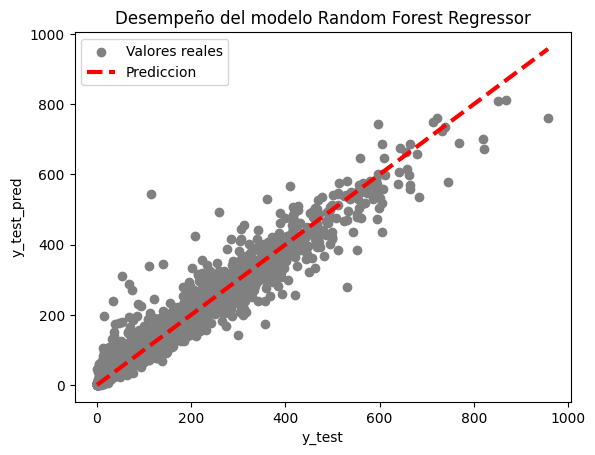

In [60]:
plt.scatter(y_test, y_pred, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo Random Forest Regressor')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

![separator2](https://i.imgur.com/4gX5WFr.png)
### Modelo Lasso Regressor

#### Se crea el Data Frame de Features que se utilizará y el target.

In [61]:
X = bike_features
y = bike_target

#### Se define el grupo de entrenamiento y de prueba.


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Se instancia el modelo.

In [63]:
lasso = Lasso()

#### Se entrena el modelo

In [64]:
lasso.fit(X_train, y_train)


Lasso()

#### Se predice los valores.

In [65]:
predict = lasso.predict(X_test)

In [66]:
lasso.score(X_test, y_test)

0.3575903560995196

#### Se predice los valores con el conjunto de testeo y se guarda en una variable. 

In [67]:
y_pred = lasso.predict(X_test)

In [68]:
# calcular el RMSE
RMSE=mean_squared_error(y_test, y_pred, squared=False)
print('Raíz del Error Cuadrático Medio: ', RMSE)

Raíz del Error Cuadrático Medio:  119.0847052071349


In [69]:
#vamos a calcular el valor del error medio
mean_absolute_error(y_test, y_pred)

89.43205453316729

C:\Users\crisz\AppData\Local\Temp\ipykernel_180060\458809994.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')


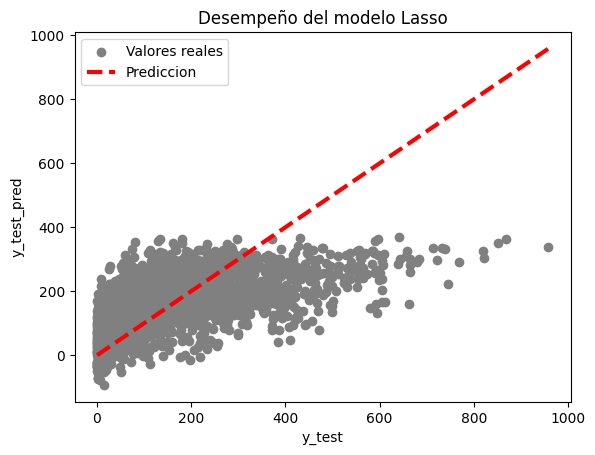

In [70]:
#graficamos el desempeño del modelo de regresion Lasso 
plt.scatter(y_test, y_pred, color='grey')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3,color='red')
plt.legend(['Valores reales', 'Prediccion'])
plt.title('Desempeño del modelo Lasso')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

![separator2](https://i.imgur.com/4gX5WFr.png)

### Se prueba el mejor modelo Random Forest Regressor con el Dataset de Testeo: bike_test.

In [71]:
df_resultado = model_RFR.predict(bike_test)

In [85]:
criszam99 = pd.DataFrame(df_resultado)

In [86]:
criszam99.to_csv('./criszam99.csv',index=False)

In [88]:
#agregar nombre de columna al archivo criszam99
criszam99.columns = ['pred']
criszam99.to_csv('./criszam99.csv',index=False)